In [1]:

from google.colab import files
uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling (3).csv


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


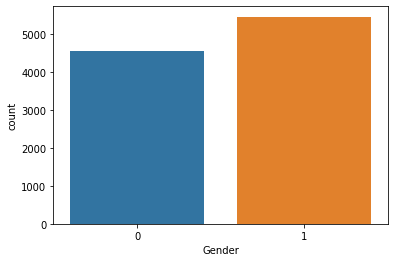

In [2]:
import pandas as pd
data=pd.read_csv("Churn_Modelling.csv")
data.head()
data=data.drop(["CustomerId","RowNumber","Surname"],axis=1)
data.head()
data['Geography'].unique()
k=pd.get_dummies(data['Geography'],drop_first=True)
k.head()
from sklearn.preprocessing import LabelEncoder
data['Gender']=LabelEncoder().fit_transform(data['Gender'])
data.head()
import seaborn as sns
sns.countplot(data['Gender'])
data=data.join(k)
data.head()
data=data.drop("Geography",axis=1)


In [3]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [4]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany',
       'Spain'],
      dtype='object')

In [5]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [6]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain'],
      dtype='object')

In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train.shape

(8000, 11)

In [12]:
X_test.shape

(2000, 11)

In [13]:
y_test.shape

(2000,)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
model = Sequential()
model.add(Dense(units=60,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


In [15]:
model.fit(x=X_train,  y=y_train, epochs=250, validation_data=(X_test, y_test), verbose=1)

Epoch 1/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4839 - val_loss: 0.4572
Epoch 2/250
250/250 [==============================] - 0s 1ms/step - loss: 0.4434 - val_loss: 0.4362
Epoch 3/250
250/250 [==============================] - 0s 1ms/step - loss: 0.4241 - val_loss: 0.4119
Epoch 4/250
250/250 [==============================] - 0s 1ms/step - loss: 0.4064 - val_loss: 0.3905
Epoch 5/250
250/250 [==============================] - 0s 1ms/step - loss: 0.3815 - val_loss: 0.3641
Epoch 6/250
250/250 [==============================] - 0s 1ms/step - loss: 0.3703 - val_loss: 0.3549
Epoch 7/250
250/250 [==============================] - 0s 1ms/step - loss: 0.3610 - val_loss: 0.3495
Epoch 8/250
250/250 [==============================] - 0s 1ms/step - loss: 0.3570 - val_loss: 0.3453
Epoch 9/250
250/250 [==============================] - 0s 1ms/step - loss: 0.3531 - val_loss: 0.3459
Epoch 10/250
250/250 [==============================] - 0s 1ms/step - loss: 0.3524 - val_lo

In [16]:
losses = pd.DataFrame(model.history.history)

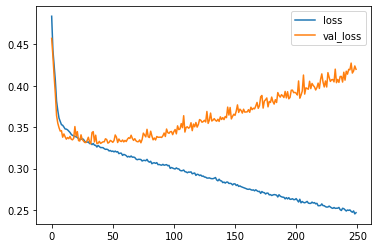

In [17]:
losses.plot()

In [18]:
model = Sequential()
model.add(Dense(units=60,activation='relu'))
model.add(Dense(units=40,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [21]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
250/250 [==============================] - 0s 2ms/step - loss: 0.4893 - val_loss: 0.4480
Epoch 2/600
250/250 [==============================] - 0s 1ms/step - loss: 0.4310 - val_loss: 0.4146
Epoch 3/600
250/250 [==============================] - 0s 1ms/step - loss: 0.3993 - val_loss: 0.3813
Epoch 4/600
250/250 [==============================] - 0s 1ms/step - loss: 0.3766 - val_loss: 0.3608
Epoch 5/600
250/250 [==============================] - 0s 1ms/step - loss: 0.3672 - val_loss: 0.3603
Epoch 6/600
250/250 [==============================] - 0s 1ms/step - loss: 0.3631 - val_loss: 0.3516
Epoch 7/600
250/250 [==============================] - 0s 1ms/step - loss: 0.3603 - val_loss: 0.3457
Epoch 8/600
250/250 [==============================] - 0s 1ms/step - loss: 0.3574 - val_loss: 0.3490
Epoch 9/600
250/250 [==============================] - 0s 1ms/step - loss: 0.3544 - val_loss: 0.3546
Epoch 10/600
250/250 [==============================] - 0s 1ms/step - loss: 0.3513 - val_lo

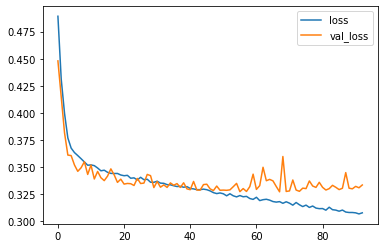

In [23]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [24]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1577
           1       0.71      0.59      0.64       423

    accuracy                           0.86      2000
   macro avg       0.80      0.76      0.78      2000
weighted avg       0.85      0.86      0.86      2000



In [26]:
print(confusion_matrix(y_test,predictions))

[[1473  104]
 [ 174  249]]
